# Исследование объявлений о продаже квартир

Мы работаем с архивом о продаже квартир. Необходимо определить рыночную стоимость и установить типичные параметры продаваемых квартир.

### Шаг 1. Изучение общей информации о данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from pymystem3 import Mystem 
m = Mystem()
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 100)

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# для категориальных и булевых переменных использую метод value_counts(), чтобы узнать больше инфо
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [7]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [8]:
data['open_plan'].value_counts()


False    23632
True        67
Name: open_plan, dtype: int64

In [9]:
data['locality_name'].value_counts() #вижу, что больше половины квартир в СПБ, остальные - в области. 
# думаю, далее все квартиры из области будет необходимо объединить в одну категорию

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Лисий Нос             1
поселок Красносельское        1
деревня Куровицы              1
деревня Кривко                1
деревня Вахнова Кара          1
Name: locality_name, Length: 364, dtype: int64

In [10]:
data['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Лисий Нос             1
поселок Красносельское        1
деревня Куровицы              1
деревня Кривко                1
деревня Вахнова Кара          1
Name: locality_name, Length: 364, dtype: int64

In [11]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод:
I. Пропуски в столбцах:
1. ceiling_height
2. floors_total
3. living_area
4. is_apartment
5. kitchen_area
6. balcony
7. locality_name
8. airports_nearest
9. cityCenters_nearest
10. parks_around3000
11. parks_nearest
12. ponds_around3000
13. ponds_nearest
14. days_exposition

II. Странные значения из describe:

1. максимальная total_area = 900
2. rooms.max = 19, rooms.min = 0
3. ceiling_height.min = 1, ceiling_height.mx = 100

### Шаг 2. Предобработка данных

Обработаю данные:

1. Приведу столбец с категориальной переменной к строчному регистру и скорректирую названия локаций;
2. Заполню пропуски там, где это необходимо.

1. Приведу столбец с категориальной переменной к строчному регистру и скорректирую названия локаций

In [12]:
data['locality_name'] = data['locality_name'].str.lower()

Также в таблице дублируются населенные пункты, но с разным названием. Например, "мурино" и "поселок мурино", а также где-то в названиях есть буква ё, а где-то ее нет.

Заменим все буквы ё на букву е:

In [13]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

Приведу названия к одному виду:

In [14]:
data['locality_name'] = data['locality_name'].str.replace('поселок мурино','мурино')

In [15]:
data['locality_name'] = data['locality_name'].str.replace('поселок шушары','шушары')

In [16]:
data['locality_name'] = data['locality_name'].str.replace('деревня кудрово','кудрово')

2. Заполню пропуски там, где это необходимо.

Для начала разделю все данные на 2 части: СПБ и Лен.Область. Сделаю это, т.к. пропуски в картографических данных буду заполнять 
в зависимости от этого параметра

In [17]:
spb_data = data.query('locality_name == "санкт-петербург"') # выделиладанные по СПБ в отдельны датафрейм

In [18]:
region_data = data.query('locality_name != "санкт-петербург"') # выделила лен область в отдельный дата фрейм

1. Заполню пропуски в ceiling_height

In [19]:
data['ceiling_height'].isnull().sum() # считаю коичество пропусков в ceiling_height

9195

In [20]:
#выделю в отдельный датафрейм строки, где высота потолка нормальная - от 2 до 4 метров, посчитаю среднее среди них
# выбрала среднее, т.к. высота полотка ограничена плюс убрала нереальные значения
normal_ceiling_height = data.query('2 <= ceiling_height <= 4')
normal_ceiling_height['ceiling_height'].mean()

2.7210016636628307

In [21]:
data['ceiling_height'].mean() # сравнила со средним среди всего набора данных - оно почти такое же

2.77149889685604

In [22]:
data.query('ceiling_height > 4').sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,санкт-петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


In [23]:
# заменю на среднее из нормального датафрейма, т.к. там нет выбросов
data['ceiling_height'] = data['ceiling_height'].fillna(normal_ceiling_height['ceiling_height'].mean())

2. Заполню пропуски в floors_total

In [24]:
data['floors_total'].isnull().sum() # считаю количество пропусков в floors_total

86

Пропусков всего 86 - это очень мало. Можно заменить их медианой/средним, но что если это среднее окажется меньше, чем число в ячейке floor? Проверю, есть ли такие случаи?

In [25]:
data[data['floors_total'].isna()].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,86.000000,8.600000e+01,86.000000,86.000000,86.000000,0.0,53.000000,86.000000,39.000000,47.000000,76.000000,76.000000,76.000000,34.000000,76.000000,49.000000,77.000000
mean,5.453488,6.814282e+06,62.537674,1.930233,2.726943,NaN,32.435849,10.023256,13.683590,0.085106,30141.184211,15666.710526,0.605263,549.941176,0.802632,475.714286,181.896104
std,4.010741,5.551092e+06,37.178265,1.082380,0.037026,NaN,19.019650,6.210005,5.768561,0.408059,13720.664002,6999.313903,0.784499,529.757975,0.748683,243.730811,232.229899
min,0.000000,1.640000e+06,23.170000,0.000000,2.650000,NaN,10.000000,1.000000,3.500000,0.000000,7050.000000,3148.000000,0.000000,24.000000,0.000000,130.000000,3.000000
25%,3.000000,3.480000e+06,35.842500,1.000000,2.721002,NaN,17.500000,5.000000,10.665000,0.000000,21570.750000,11303.750000,0.000000,251.000000,0.000000,350.000000,49.000000
50%,5.000000,5.192500e+06,55.950000,2.000000,2.721002,NaN,31.000000,8.000000,12.200000,0.000000,25892.000000,14637.000000,0.000000,400.000000,1.000000,374.000000,111.000000
75%,8.750000,7.523265e+06,76.725000,3.000000,2.721002,NaN,45.380000,13.750000,15.185000,0.000000,40679.000000,17369.000000,1.000000,655.250000,1.000000,652.000000,183.000000
max,19.000000,4.034825e+07,284.000000,6.000000,3.000000,NaN,104.760000,24.000000,40.000000,2.000000,61908.000000,34085.000000,3.000000,2276.000000,3.000000,1158.000000,1257.000000


In [26]:
data['floors_total'].median()

9.0

Да, если мы все пропущенные значения из floors_total заменим на медиану, то в некоторых строках будет противоречие, т.к. floor.max = 24, а 	data['floors_total'].median() = 9. Поэтому пропуски в floors_total я заменю на значение из floor. Да6 это будет менее точно, но не будет противоречий, а также я учитываю то, что 86 пропусков - это треть процента от всего датафрейма.

In [27]:
data['floors_total'] = data['floors_total'].fillna(data['floor']) # заполнила пропуски значением floor

In [28]:
data['floors_total'].isnull().sum() # проверяю количество пропусков в floors_total

0

3. Заполню пропуски в living_area

Создам столбцы с отношением living_area к total_area:

In [29]:
data['prop_living_to_total_area'] = data['living_area'] / data['total_area']

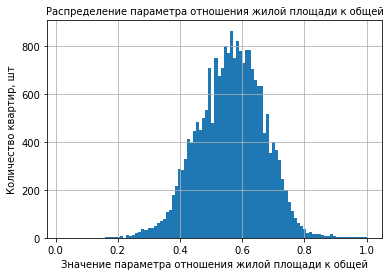

In [30]:
ax = data.prop_living_to_total_area.hist(bins=100) # посмотрю распределение на гистограмме
ax.set_xlabel('Значение параметра отношения жилой площади к общей', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра отношения жилой площади к общей', fontsize = 10);

Распределение нормальное. Поэтому я сначала найду медиану/среднее prop_living_to_total_area, а затем этой медианой заполню пропуски в prop_living_to_total_area. Следующим шагом заполню пропуски в living_area как произведение total_area и prop_living_to_total_area.

In [31]:
data['prop_living_to_total_area'].describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
Name: prop_living_to_total_area, dtype: float64

Медиана и среднее практически равны. Использую среднее.

In [32]:
data['prop_living_to_total_area'] =(data['prop_living_to_total_area']
                                    .fillna(data['prop_living_to_total_area'].mean()))

In [33]:
data['prop_living_to_total_area'].isnull().sum() # проверю, остались ли пропуски

0

Заполню пропуски в living_area как произведение total_area и prop_living_to_total_area.

In [34]:
data['living_area'] =(data['living_area']
                                    .fillna(data['prop_living_to_total_area'] * data['total_area']))

In [35]:
data['living_area'].isnull().sum() #проверю, остались ли пропуски

0

4. Заполню пропуски в is_apartment. 

In [36]:
data['is_apartment'].isnull().sum()

20924

Пропусков много - скорее всего люди просто не заполнили этот параметр. Также я предположу, что если квартира является апартаментами, то эту ячейку заполняют всегда, т.к. у апартаментов и квартир есть критические различия. Поэтому заменю пропуски на False

In [37]:
data['is_apartment'] = data['is_apartment'].fillna(False)

5. Заполню пропуски в kitchen_area

Создам столбцы с отношением kitchen_area к total_area:

In [38]:
data['prop_kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

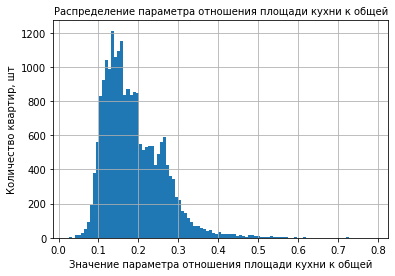

In [39]:
ax = data.prop_kitchen_to_total_area.hist(bins=100) # посмотрю распределение на гистограмме
ax.set_xlabel('Значение параметра отношения площади кухни к общей', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра отношения площади кухни к общей', fontsize = 10);

In [40]:
data.describe() # посомтрю общие характеристики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prop_living_to_total_area,prop_kitchen_to_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,21421.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.751906,10.671463,34.562480,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,0.564766,0.187355
std,5.682529,1.088701e+07,35.654083,1.078405,0.986830,6.595802,22.326965,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,0.101049,0.072968
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,0.500000,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.721002,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,0.564766,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.721002,16.000000,42.100000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,0.631579,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879


Заполню пропуски аналогично living_area, но буду использовать медиану, а не среднее, т.к. здесь больше выбросов.

In [41]:
data['prop_kitchen_to_total_area'] =(data['prop_kitchen_to_total_area']
                                    .fillna(data['prop_kitchen_to_total_area'].median()))

In [42]:
data['prop_kitchen_to_total_area'].isnull().sum() # проверю, остались ли пропуски

0

In [43]:
data['kitchen_area'] =(data['kitchen_area']
                                    .fillna(data['prop_kitchen_to_total_area'] * data['total_area']))

In [44]:
data['kitchen_area'].isnull().sum() # проверю, остались ли пропуски

0

6. Заполню пропуски в balcony.

In [45]:
data['balcony'].isnull().sum()  # посчитаю пропуски

11519

Пропусков в данных о балконах очень много, поэтому проверю корреляцию количества балконов и других параметров:

In [46]:
parameters_for_balcony = ['rooms', 
              'cityCenters_nearest', 
              'total_area',
              'ceiling_height',
              'floors_total',
               'floor'
             ]

In [47]:
for parameter in parameters_for_balcony:
    print('Для всего массива данных корреляция количества балконов с', parameter, 'равна {:.2f}'
          .format(data['balcony'].corr(data[parameter])))

Для всего массива данных корреляция количества балконов с rooms равна 0.02
Для всего массива данных корреляция количества балконов с cityCenters_nearest равна 0.05
Для всего массива данных корреляция количества балконов с total_area равна 0.05
Для всего массива данных корреляция количества балконов с ceiling_height равна 0.04
Для всего массива данных корреляция количества балконов с floors_total равна 0.19
Для всего массива данных корреляция количества балконов с floor равна 0.17


Корреляция со всем параметрами очеь слабая, поэтому оставлю пропуски в количестве балконов незаполненными.

7. Заменю пропуски в locality_name

In [48]:
data['locality_name'].isnull().sum()

49

Пропусков очень мало. Заменю их либо на СПБ ли на ЛО. Посмотрю характеристики датафремов: с пропусками в locality_name, СПБ, ЛО. Далее сравню характеристики locality_name и СПБ, locality_name и ЛО. Исходя из этого сделаю выводы и произведу замену пропусков. Буду ориентироваться на параметр cityCenters_nearest. 

In [49]:
data[data['locality_name'].isna()].describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prop_living_to_total_area,prop_kitchen_to_total_area
count,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.000000,43.000000,41.000000,41.000000,41.000000,15.000000,41.000000,25.000000,48.000000,49.000000,49.000000
mean,8.000000,6.745167e+06,69.799796,2.326531,2.798062,9.55102,40.232373,5.448980,12.122674,0.325581,24572.341463,11278.902439,0.536585,476.733333,1.024390,489.280000,238.645833,0.571656,0.177285
std,5.552777,4.496722e+06,30.575956,0.944011,0.235988,7.64052,19.128401,5.784538,7.047189,0.747087,8461.691597,8910.058254,0.839570,179.158137,1.083693,232.420151,190.620542,0.092457,0.063868
min,0.000000,1.750000e+06,29.400000,1.000000,2.600000,2.00000,13.000000,1.000000,5.000000,0.000000,10556.000000,1322.000000,0.000000,67.000000,0.000000,142.000000,4.000000,0.342195,0.097076
25%,3.000000,3.950000e+06,46.500000,2.000000,2.721002,5.00000,28.000000,2.000000,8.200000,0.000000,21654.000000,4383.000000,0.000000,374.500000,0.000000,374.000000,83.250000,0.525535,0.130000
50%,7.000000,5.130593e+06,63.000000,2.000000,2.721002,6.00000,36.600000,3.000000,10.000000,0.000000,22041.000000,8943.000000,0.000000,472.000000,1.000000,374.000000,211.000000,0.564766,0.172414
75%,10.000000,8.000000e+06,83.000000,3.000000,2.721002,11.00000,50.800000,6.000000,13.380000,0.000000,25771.000000,17369.000000,1.000000,591.500000,1.000000,603.000000,331.250000,0.647727,0.200000
max,20.000000,2.400000e+07,178.300000,4.000000,4.000000,24.00000,100.697693,23.000000,41.600000,4.000000,60195.000000,41294.000000,3.000000,740.000000,3.000000,953.000000,869.000000,0.727397,0.364544


In [50]:
spb_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,15721.000000,1.572100e+04,15721.000000,15721.000000,10104.000000,15651.000000,14581.000000,15721.000000,14342.000000,8009.000000,15636.000000,15660.000000,15660.000000,7284.000000,15660.000000,7983.000000,13638.000000
mean,10.180205,8.062507e+06,64.751488,2.171618,2.803709,11.395885,36.959148,6.242033,11.155806,1.141965,28046.186237,11601.291571,0.627586,498.597886,0.770434,520.213955,182.792198
std,5.749004,1.301313e+07,40.417095,1.148098,1.296912,6.372330,24.701374,4.900486,6.543392,1.093276,11557.063820,4842.035279,0.787867,345.181284,0.924568,280.260745,224.719204
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,4.200000e+06,42.000000,1.000000,2.550000,5.000000,19.900000,3.000000,7.200000,0.000000,18584.250000,8327.000000,0.000000,295.000000,0.000000,293.000000,42.000000
50%,10.000000,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.300000,5.000000,9.900000,1.000000,26757.500000,12244.500000,0.000000,460.000000,1.000000,503.000000,95.000000
75%,14.000000,8.160000e+06,74.600000,3.000000,2.870000,16.000000,44.000000,8.000000,12.500000,2.000000,36614.000000,14943.000000,1.000000,619.000000,1.000000,738.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,52.000000,409.700000,33.000000,112.000000,5.000000,54784.000000,29493.000000,3.000000,3190.000000,3.000000,1337.000000,1572.000000


In [51]:
region_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,7978.000000,7.978000e+03,7978.000000,7978.000000,4400.000000,7962.000000,7215.000000,7978.000000,7079.000000,4171.000000,2521.000000,2520.00000,2521.000000,795.000000,2521.000000,1127.000000,6880.000000
mean,9.224492,3.544434e+06,51.672666,1.871647,2.697532,9.254459,29.402912,5.203309,9.382578,1.165668,33429.804839,30286.19246,0.510908,419.400000,0.769139,502.163265,177.115262
std,5.494695,2.204650e+06,21.067982,0.893092,1.171376,6.798594,13.962146,4.781109,4.084416,1.027736,17198.312919,9391.31892,0.878750,305.958725,1.019967,258.581322,209.447700
min,0.000000,4.300000e+05,15.000000,0.000000,1.200000,1.000000,2.000000,1.000000,2.300000,0.000000,9294.000000,1322.00000,0.000000,4.000000,0.000000,22.000000,3.000000
25%,5.000000,2.350000e+06,37.000000,1.000000,2.500000,5.000000,18.000000,2.000000,6.600000,0.000000,18590.000000,24302.00000,0.000000,228.000000,0.000000,301.000000,45.000000
50%,9.000000,3.200000e+06,47.000000,2.000000,2.600000,5.000000,28.000000,4.000000,8.900000,1.000000,26599.000000,30308.50000,0.000000,376.000000,0.000000,485.000000,96.000000
75%,13.000000,4.200000e+06,61.000000,2.000000,2.700000,12.000000,37.400000,6.000000,10.900000,2.000000,52480.000000,33633.75000,1.000000,531.000000,1.000000,666.000000,232.000000
max,39.000000,4.200000e+07,380.000000,8.000000,32.000000,60.000000,239.400000,27.000000,64.000000,5.000000,84869.000000,65968.00000,3.000000,2131.000000,3.000000,1344.000000,1580.000000


Параметр cityCenters_nearest у датафрема с пропусками ближе к аналогичному параметру в датафрейме СПБ. Поэтому заменю пропуски в locality_name значением "санкт-петербург"

In [52]:
data['locality_name'] = data['locality_name'].fillna('санкт-петербург') 


Далее идет блок пропусков в параметрах6 полученных на основе картографических данных. Проверю на симметричность пропуски

In [53]:
data[(pd.isnull(data.parks_around3000)) & (~pd.isnull(data.cityCenters_nearest))].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prop_living_to_total_area,prop_kitchen_to_total_area
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в parks_around3000 и в cityCenters_nearest симментричны. Но их лишком много, поэтому удалить не можем.
Выделим пропуски в отдельный ДФ и посмотрим на его характеристики.

In [54]:
data_missed = data[data.parks_around3000.isnull()]
data_missed.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prop_living_to_total_area,prop_kitchen_to_total_area
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.721002,12.0,14.400000,5,False,False,False,9.100000,NaN,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.473684,0.299342
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.721002,27.0,15.430000,26,False,False,False,8.810000,NaN,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.465320,0.265682
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.721002,5.0,30.000000,5,False,False,False,9.000000,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.555556,0.166667
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750000,25.0,30.000000,15,False,False,False,11.000000,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,0.517241,0.189655
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.721002,9.0,18.524309,2,False,False,False,5.655172,NaN,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,0.564766,0.172414


Вижу, что пропуски совпадают во всех описаниях, основанных на картографических данных.

Сравним эти таблицы по ключевым параметрам: количество комнат, этаж, место с таблицей region_data, т.к. большинство пропущенных занчений принадлежат квартирам из лен области

In [55]:
data_missed.floor.value_counts(normalize=True)

2     0.173070
1     0.166365
3     0.136281
5     0.126133
4     0.121602
6     0.038963
7     0.037514
9     0.030989
8     0.028452
10    0.022291
12    0.017216
11    0.015042
13    0.013411
15    0.013229
14    0.010874
16    0.009967
17    0.009242
18    0.007249
20    0.003987
21    0.003806
19    0.003443
22    0.003081
23    0.002175
24    0.002175
25    0.001450
26    0.001269
27    0.000725
Name: floor, dtype: float64

In [56]:
region_data.floor.value_counts(normalize=True)

2     0.167586
1     0.165079
3     0.137879
4     0.123088
5     0.122838
6     0.042367
7     0.035849
9     0.032715
8     0.031085
10    0.021183
12    0.015417
11    0.014916
15    0.013161
13    0.011281
14    0.010404
16    0.009526
17    0.008774
18    0.007897
21    0.005139
19    0.004262
22    0.004136
20    0.003886
23    0.003635
24    0.002507
25    0.002256
26    0.002131
27    0.001003
Name: floor, dtype: float64

In [57]:
data_missed.rooms.value_counts(normalize=True)

1    0.391265
2    0.364987
3    0.201885
4    0.022109
0    0.014317
5    0.004531
6    0.000544
7    0.000362
Name: rooms, dtype: float64

In [58]:
region_data.rooms.value_counts(normalize=True)

1    0.389822
2    0.355227
3    0.211958
4    0.026573
0    0.010905
5    0.004387
6    0.000752
7    0.000251
8    0.000125
Name: rooms, dtype: float64

In [59]:
data_missed.locality_name.value_counts(normalize=True)

мурино                                   0.106560
кудрово                                  0.085538
всеволожск                               0.072128
гатчина                                  0.055636
выборг                                   0.042950
                                           ...   
поселок рабитицы                         0.000181
поселок володарское                      0.000181
поселок городского типа большая ижора    0.000181
деревня курковицы                        0.000181
поселок платформа 69-й километр          0.000181
Name: locality_name, Length: 309, dtype: float64

In [60]:
region_data.locality_name.value_counts(normalize=True)

мурино                               0.074410
кудрово                              0.059528
шушары                               0.055492
всеволожск                           0.050195
пушкин                               0.046538
                                       ...   
садовое товарищество приладожский    0.000126
поселок жилпоселок                   0.000126
поселок ромашки                      0.000126
деревня шпаньково                    0.000126
деревня лупполово                    0.000126
Name: locality_name, Length: 327, dtype: float64

В целом, показатели похожи, поэтому буду считать пропуски случайными и заполню их медианными либо средними значениями.

8. Заменю пропуски в airports_nearest

In [61]:
data['airports_nearest'].isnull().sum() # много значений, рассмотрю подробнее

5542

Рассмотрю 2 гистограммы для параметра airports_nearest: для СПБ и ЛО:

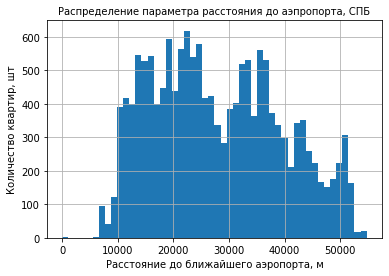

In [62]:
ax = spb_data.airports_nearest.hist(bins=50)
ax.set_xlabel('Расстояние до ближайшего аэропорта, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до аэпропорта, СПБ', fontsize = 10);

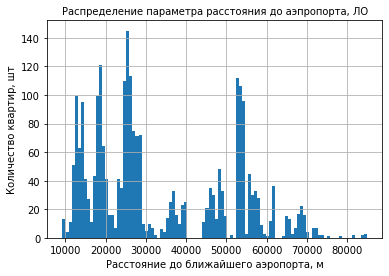

In [63]:
ax = region_data.airports_nearest.hist(bins=100) # выберу для заполнения пропусков в лен области медиану
ax.set_xlabel('Расстояние до ближайшего аэропорта, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до аэпропорта, ЛО', fontsize = 10);

что я увидела:
1. В ЛО расстояния до аэропорта поделились на группы. Предположу, что причиной этому разная отдаленность от аэропорта для разных населенных пунктов;
2. В СПБ распределение больше похоже на нормальное, но видно некоторое различие по, наверно, районам. Но данных о районах у нас нет. 

Вывод: заполню пропуски медианными значениями для каждого населенного пункта.

In [64]:
data['airports_nearest'] = (data.groupby('locality_name')['airports_nearest']
 .apply(lambda x: x.fillna(x.median())))

In [65]:
data['airports_nearest'].isnull().sum()

4830

Заполнились не все пропуски, значит, для некоторых локаций вообще ни в одной строке не был заполнен параметр airports_nearest. Поэтому заполню оставшиеся пропуски медианными значениями airports_nearest по СПБ и ЛО.

In [66]:
# для ленобласти заполнила медианой по СПБ
data.loc[data['locality_name'] == 'санкт-петербург', 'airports_nearest'] = data.loc[
data['locality_name'] == 'санкт-петербург', 'airports_nearest'].fillna(spb_data[
'airports_nearest'].median())

In [67]:
# для ленобласти заполнила медианой по ленобласти
data.loc[data['locality_name'] != 'санкт-петербург', 'airports_nearest'] = data.loc[
data['locality_name'] != 'санкт-петербург', 'airports_nearest'].fillna(region_data[
'airports_nearest'].median())

9. Заполню пропуски в cityCenters_nearest.

In [68]:
data['airports_nearest'].isnull().sum() # проверила количество пропусков

0

In [69]:
data['cityCenters_nearest'].isnull().sum() # посчитала количество пропусков

5519

In [70]:
spb_data['cityCenters_nearest'].isnull().sum() # посчитала кол-во пропусков в СПБ

61

In [71]:
region_data['cityCenters_nearest'].isnull().sum() # посчитала кол-во пропусков в области

5458

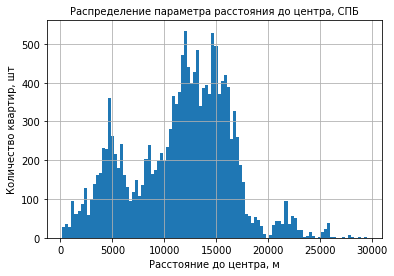

In [72]:
ax = spb_data.cityCenters_nearest.hist(bins=100) # гистограма похожа на нормальное распределение
ax.set_xlabel('Расстояние до центра, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до центра, СПБ', fontsize = 10);

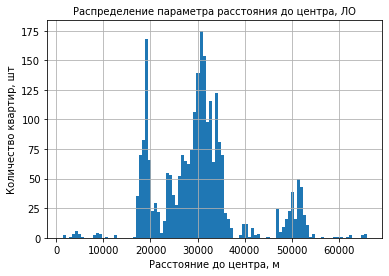

In [73]:
ax = region_data.cityCenters_nearest.hist(bins=100)
ax.set_xlabel('Расстояние до центра, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до центра, ЛО', fontsize = 10);

Что я увидела:
1. пропусков по СПБ мало (61), по ЛО - много (5458).
2. Распределение значений cityCenters_nearest снова зависит от населенного пунктя для ЛО и, как я предполагада ранее, от района для СПБ.
3. Заполню пропуски медианными значениями для каждого населенного пункта, т.к. для ЛО это будет приближенно к правде, а для СПБ, наверно, будет менее точно, но, пропусков для СПБ мало, поэтому осталю эту пограшность для СПБ.

In [74]:
data['cityCenters_nearest'] = (data.groupby('locality_name')['cityCenters_nearest']
 .apply(lambda x: x.fillna(x.median())))

In [75]:
data['cityCenters_nearest'].isnull().sum() # проверила количество пропусков

4830

Заполнились не все пропуски, значит, для некоторых локаций вообще ни в одной строке не был заполнен параметр
cityCenters_nearest. Поэтому заполню оставшиеся пропуски медианными значениями cityCenters_nearest по СПБ и ЛО.

In [76]:
# заполнила медианой по СПБ
data.loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest'] = (data
                        .loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest']
                        .fillna(spb_data['cityCenters_nearest']
                        .median()))

In [77]:
# заполнила медианой по ЛО
data.loc[data['locality_name'] != 'санкт-петербург', 'cityCenters_nearest'] = (data
                        .loc[data['locality_name'] != 'санкт-петербург', 'cityCenters_nearest']
                        .fillna(region_data['cityCenters_nearest']
                        .median()))

In [78]:
data['cityCenters_nearest'].isnull().sum() # проверила количество пропусков

0

10. Заполню пропуски в parks_around3000.

In [79]:
data['parks_around3000'].isnull().sum() # посчитаем пропуски в parks_around3000

5518

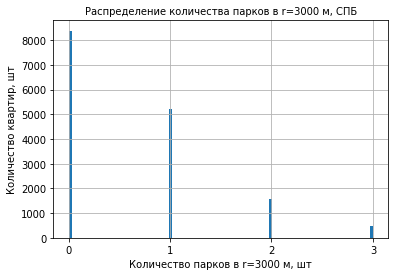

In [80]:
ax = spb_data.parks_around3000.hist(bins=100)
ax.set_xlabel('Количество парков в r=3000 м, шт', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение количества парков в r=3000 м, СПБ', fontsize = 10);
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

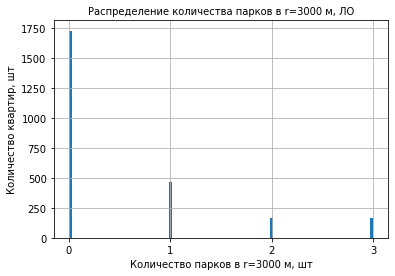

In [81]:
ax = region_data.parks_around3000.hist(bins=100)
ax.set_xlabel('Количество парков в r=3000 м, шт', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение количества парков в r=3000 м, ЛО', fontsize = 10);
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Заполню пропуски медианным значением дя каждого населенного пункта.

In [82]:
data['parks_around3000'] = (data.groupby('locality_name')['parks_around3000']
 .apply(lambda x: x.fillna(x.median())))

In [83]:
data['parks_around3000'].isnull().sum() # посчитаем пропуски в parks_around3000

4830

Заполнились не все пропуски, значит, для некоторых локаций вообще ни в одной строке не был заполнен параметр
parks_around3000. Оставлю эти пропуски, т.к. их много, а у меня слишком мало информации, чтобы их заполнить.

In [84]:
data['parks_around3000'].isnull().sum() # посчитаем пропуски в parks_around3000

4830

11. Заполню пропуски в parks_nearest.

In [85]:
data['parks_nearest'].isnull().sum() # посчитаем пропуски в parks_nearest

15620

Рассмотрю распределение parks_nearest для СПБ и ЛО:

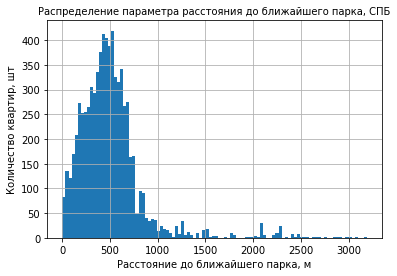

In [86]:
ax = spb_data.parks_nearest.hist(bins=100) # гистограмма расстояния до парка СПБ
ax.set_xlabel('Расстояние до ближайшего парка, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до ближайшего парка, СПБ', fontsize = 10);

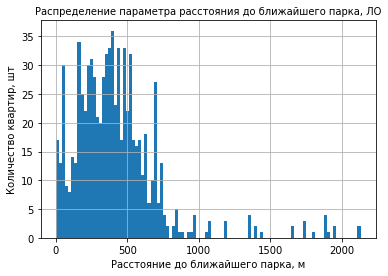

In [87]:
ax = region_data.parks_nearest.hist(bins=100) # гистограмма расстояния до парка Лен область
ax.set_xlabel('Расстояние до ближайшего парка, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до ближайшего парка, ЛО', fontsize = 10);

Заполню пропуски медианным значением дя каждого населенного пункта.

In [88]:
data['parks_nearest'] = (data.groupby('locality_name')['parks_nearest']
 .apply(lambda x: x.fillna(x.median())))

In [89]:
data['parks_nearest'].isnull().sum() # посчитаем пропуски в parks_nearest

5998

Заполнились не все пропуски, значит, для некоторых локаций вообще ни в одной строке не был заполнен параметр
parks_nearest. Оставлю эти пропуски, т.к. их много, а у меня слишком мало информации, чтобы их заполнить.

Вижу несовпадение: медианное количество парков в 3000м от дома в Лен. области равно 0, но медианное расстояние о парка равно 376.000000
Также можно заметить, что максимальное расстояние до парка это 2131 м в Лен области и 3190 м в СПБ. Получается, в Лен области рядом с каждым домом есть парк в радиусе 3000 м, а в СПБ - почти каждым. При этом в Лен области боьше половины значений parks_around3000 равны 0, а в СПБ - почти половина. То есть данные parks_around3000 и parks_nearest противоречат друг другу. 
То же самое можно сказать о данных ponds_around3000 и ponds_nearest.
Я предполагаю, что картографические данные по категориям parks_around3000 и parks_nearest, ponds_around3000 и ponds_nearest
рассчитаны неверно. У меня возникли следующие вопросы:
1. Что считается парком? Те объекты, которые официально называются парком, или лес тоже? Или двор, с густорастущими деревьями тоже?
2. Что считается водоемом? Каналы СПБ считаются водоемами? 

Таким образом, исходя из спортных данных, вопросов выше, а также количества пропусков в данных для parks_nearest и ponds_nearest (заполнены только 8079 и 9110 соответственно, что составляет меньше трети), далее, при анализе я не буду учитывать столбцы parks_nearest и ponds_nearest.

Вывод: сообщить расзработчикам, что какие-то из параметров выше скорее всего считаются неверно и требуют дополнительной проверки.

12, 13. Заполню пропуски в ponds_around3000, ponds_nearest.

In [90]:
data['ponds_around3000'].isnull().sum() # посчитаем пропуски в ponds_around3000

5518

In [91]:
data['ponds_nearest'].isnull().sum() # посчитаем пропуски в ponds_nearest

14589

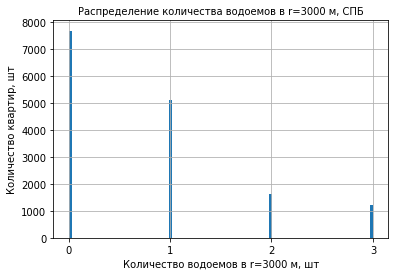

In [92]:
ax = spb_data.ponds_around3000.hist(bins=100) # гистограмма кол-во прудов СПБ
ax.set_xlabel('Количество водоемов в r=3000 м, шт', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение количества водоемов в r=3000 м, СПБ', fontsize = 10);
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

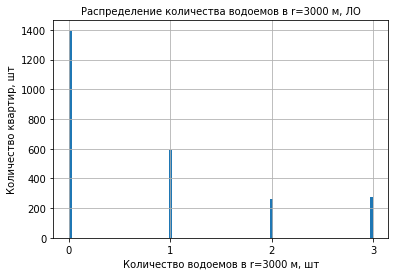

In [93]:
ax = region_data.ponds_around3000.hist(bins=100) # гистограмма кол-во прудов Лен область
ax.set_xlabel('Количество водоемов в r=3000 м, шт', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение количества водоемов в r=3000 м, ЛО', fontsize = 10);
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

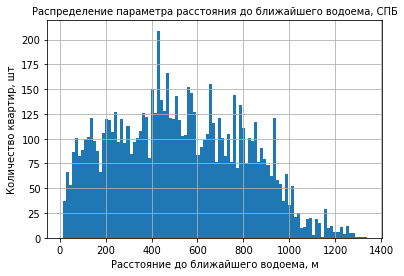

In [94]:
ax = spb_data.ponds_nearest.hist(bins=100)  # гистограмма расстояние до ближайшего пруда СПБ
ax.set_xlabel('Расстояние до ближайшего водоема, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до ближайшего водоема, СПБ', fontsize = 10);

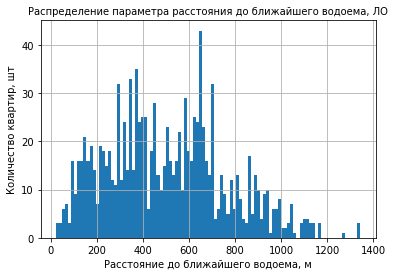

In [95]:
ax = region_data.ponds_nearest.hist(bins=100) # гистограмма расстояние до ближайшего пруда ЛО
ax.set_xlabel('Расстояние до ближайшего водоема, м', fontsize = 10);
ax.set_ylabel('Количество квартир, шт', fontsize = 10);
ax.set_title('Распределение параметра расстояния до ближайшего водоема, ЛО', fontsize = 10);

Заполню пропуски медианным значением дя каждого населенного пункта.

In [96]:
data['ponds_around3000'] = (data.groupby('locality_name')['ponds_around3000']
 .apply(lambda x: x.fillna(x.median())))

In [97]:
data['ponds_nearest'] = (data.groupby('locality_name')['ponds_nearest']
 .apply(lambda x: x.fillna(x.median())))

In [98]:
data['ponds_around3000'].isnull().sum() # посчитаем пропуски в ponds_around3000

4830

In [99]:
data['ponds_nearest'].isnull().sum() # посчитаем пропуски в ponds_nearest

4938

Заполнились не все пропуски, значит, для некоторых локаций вообще ни в одной строке не был заполнен параметр ponds_around3000, ponds_nearest . Оставлю эти пропуски, т.к. их много, а у меня слишком мало информации, чтобы их заполнить.

14. Заполню пропуск в days_exposition.

In [100]:
data['days_exposition'].isnull().sum() #посчитала количество пропусков в days_exposition

3181

Так как я не знаю причины возникновения этих пропусков и, возможно, эти объявления еще активные, то я не буду их заполнять.

Заменю тип переменных:

Для параметров ниже заменю тип переменных на целочисленный, т.к. эти данные о этажах могут быть только целыми, а в цене и расстояниях нас не интересут цифры после запятой.

In [101]:
for element in ['last_price', 'floors_total', 'cityCenters_nearest',
                'airports_nearest']:
    data[element] = data[element].astype('int')

In [102]:
data['is_apartment'] = data['is_apartment'].astype('bool') # эта перменная принимает 2 значения True or False
# следовательно, она принадлежит к типу bool

In [103]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# перевела доту в формат datetime64

In [104]:
data.info() # проверила: пропусков нет, типы переменных заменены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images                  23699 non-null int64
last_price                    23699 non-null int64
total_area                    23699 non-null float64
first_day_exposition          23699 non-null datetime64[ns]
rooms                         23699 non-null int64
ceiling_height                23699 non-null float64
floors_total                  23699 non-null int64
living_area                   23699 non-null float64
floor                         23699 non-null int64
is_apartment                  23699 non-null bool
studio                        23699 non-null bool
open_plan                     23699 non-null bool
kitchen_area                  23699 non-null float64
balcony                       12180 non-null float64
locality_name                 23699 non-null object
airports_nearest              23699 non-null int64
cityCenters_nearest           23699 non-null int64
parks_a

Проверю полные дубликаты строк в датафрейме. Если такие найдутся, буду считать что дублирование произошло по ошибке и удалю дубли.

In [105]:
data.duplicated().sum()

0

Дубликатов нет. Можно переходить к следующему шагу.

Общий вывод:

I. Пропусков в изначальном датафрейме было очень много -  в 14 столбцах из 31. Это логично - большую часть параметров заполняли люди, а они не любят заполнять абсолютно все ячейки в форме, или даже просто не знают некоторых данных о своей квартире.
Также много пропусков было в картографических данных, рассчитываемых автоматически, и некоторые данные противоречили друг другу. Как мне кажется, это говорит о том, что даже заполненные данные нельзя считать корректными, поэтому далее я не буду учитывать эти параметры при анализе.

II. Я заменила в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, locality_name, airports_nearest, cityCenters_nearest в тех случаях, когда:
1. Пропусков было мало;
2. Я смогла найти зависимость между одним параметром и другим;
3. Данные были однородными и можно было заменить пропуски средним/медианой

III. Я частично заполнила пропуски в столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, т.к. заменяла пропуски медианным значением для каждого населенного пункта, но не для всех населенных пунктов такие значения нашлись. В таких случаях я оставила пропуски на месте.

VI. Я не заполнила пропуски в столбце days_exposition, т.к. эти объявления еще могут висеть на сайте.

VII. Я не заполнила пропуски в столбце balcony, т.к. их было слишком много (почти половина всех строк) и я не нашла зависимости колчества балконов и какого-либо другого параметра из таблицы.

### Шаг 3. Анализ данных.

1. Добавлю столбец с ценой за квадратны метр.

In [106]:
data['price_per_square_metre'] = data['last_price'] / data['total_area']

In [107]:
data['price_per_square_metre'] = data['price_per_square_metre'].astype('int') 
# цифры после нуля в цене нам не важны

2. Добавлю столбец с категоризацией этажей.

Создам функцию для категоризации:

In [108]:
def floor_categorization(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'     

Через apply применю эту функцию и добавлю новый столбец floor_category с результатами категоризации:

In [109]:
data['floor_category'] = data.apply(floor_categorization, axis=1)

In [110]:
data['floor_category'].value_counts() # проверила

другой       17363
последний     3419
первый        2917
Name: floor_category, dtype: int64

3. Добавлю в таблицу столбцы с данными: день недели, месяц и год публикации.

In [111]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [112]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [113]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [114]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prop_living_to_total_area,prop_kitchen_to_total_area,price_per_square_metre,floor_category,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.000000,NaN,санкт-петербург,18863,16028,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,120370,другой,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.721002,11,18.600000,1,False,False,False,11.000000,2.0,шушары,12817,18603,0.0,NaN,0.0,584.5,81.0,0.460396,0.272277,82920,первый,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.721002,5,34.300000,4,False,False,False,8.300000,0.0,санкт-петербург,21741,13933,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92785,другой,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.721002,14,89.797718,9,False,False,False,27.413793,0.0,санкт-петербург,28098,6800,2.0,84.0,3.0,234.0,424.0,0.564766,0.172414,408176,другой,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.000000,NaN,санкт-петербург,31856,8098,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000,другой,1,6,2018


Вывод: категоризация проведена, добавлены необходимые колонки. Данные готовы к анализу.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

I. Изучу следующие параметры: площадь, цена, число комнат, высота потолков

1. Рассмотрю параметр площади. Сначала построю диаграмму размаха, а потом гистограмму.

Составлю список параметров, которые буду анализировать. Далее буду использовать этот же список для анализа интересующих меня срезов.

In [115]:
list = ['total_area', 
        'last_price', 
        'rooms',
        'ceiling_height',
        'days_exposition']

Построю в цикле гистограмму для каждого из этих параметров:

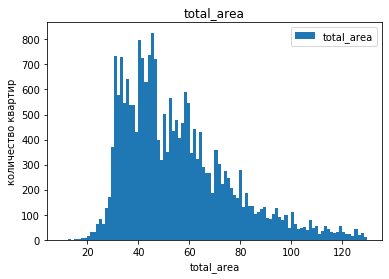

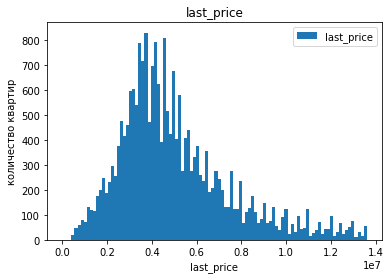

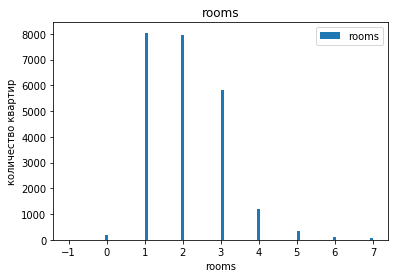

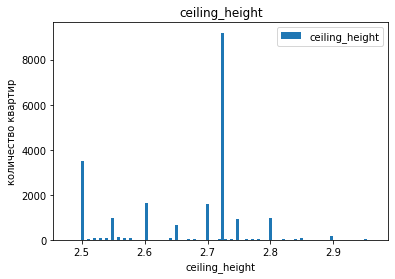

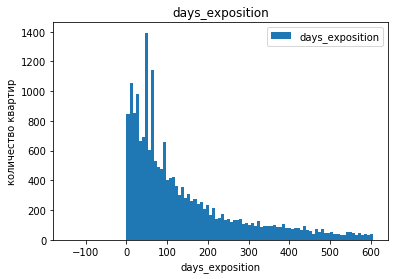

In [116]:
for item in list:
    Q1 = data[item].quantile(0.25)
    Q3 = data[item].quantile(0.75)
    IQR = Q3 - Q1
    a = Q1 - 1*IQR
    b = Q1 + 3*IQR
    ax = data.plot(kind = 'hist', 
             y = item, title = item, bins = 100, range=(a,b));
    ax.set_xlabel(item);
    ax.set_ylabel('количество квартир');

Посмотрю основные данные для каждого столбца, сделаю это через цикл.

In [117]:
for item in list:
    print(item)
    print()
    print(data[item].describe().apply(lambda x: format(x,'f')))
    print()

total_area

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: object

last_price

count        23699.000000
mean       6541548.771552
std       10887013.267545
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6800000.000000
max      763000000.000000
Name: last_price, dtype: object

rooms

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: object

ceiling_height

count    23699.000000
mean         2.751906
std          0.986830
min          1.000000
25%          2.600000
50%          2.721002
75%          2.721002
max        100.000000
Name: ceiling_height, dtype: object

days_exposition

count    20518.000000
mean       180.888634
std        219.727988
min

Вывод:
1. Большая часть квартир стоит до 14 млн, в среднем, квартира стоит 4.65 млн 
2. Большая часть квартир имеет площадь до 130 м кв, средняя площадь
   квартиры - 52 км м
3. В большей части квартир до 7 комнат, в среднем - 2 комнаты.
4. В большей части квартир потолки до 3 м, в среднем - 2.7 м
5. Большая часть квартир продается за период до 600 дней. В среднем, квартира продается    за 95 дней. Если квартира продается быстрее, чем за 45 дней, значит, она продалась    быстро, если дольше, чем за 232 дня - квартира проедается долго.

III. Уберу квартиры с необычными параметрами.
Буду ориентироваться на те цифры, которые вывела в предудущем пункте: уберу все значения, выходящие за границы 3х квартилей, за исключением потолков - для них оставлю все, что ниже 4х метров, т.к. 4 м - это высота потолков в сталинках, но они не вошли в диапазон 3х квартилей. Также отрежу все значения потолков, которые меньше 2х.
Также отрежу отрицательные значения, которые были найдены в столбцах 'days_exposition' и 'rooms'.

In [118]:
data = data.query('last_price <= 14000000')

In [119]:
data = data.query('total_area <= 130')

In [120]:
data = data.query('0 < rooms <= 7')

In [121]:
data = data.query('2 <= ceiling_height <= 4')

In [122]:
data = data.query('0 < days_exposition <= 600')

Оценю данные после удаления строк.

In [123]:
for item in list:
    print(item)
    print()
    print(data[item].describe().apply(lambda x: format(x,'f')))
    print()

total_area

count    18136.000000
mean        53.413331
std         18.996275
min         12.000000
25%         39.000000
50%         49.000000
75%         63.800000
max        130.000000
Name: total_area, dtype: object

last_price

count       18136.000000
mean      4934659.013454
std       2421675.565519
min         12190.000000
25%       3349750.000000
50%       4400000.000000
75%       6000000.000000
max      14000000.000000
Name: last_price, dtype: object

rooms

count    18136.000000
mean         1.929091
std          0.887272
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: object

ceiling_height

count    18136.000000
mean         2.700356
std          0.168712
min          2.000000
25%          2.600000
50%          2.721002
75%          2.721002
max          4.000000
Name: ceiling_height, dtype: object

days_exposition

count    18136.000000
mean       136.447563
std        135.109050
min        

Вывод: Данные стали более однородными, среднее приблизилось к медиане, а в некоторых случаях эти показатели и вовсе сравнялись.

IV. Найду корреляцию стоимости квадратного метра с параметрами:
    1. Площадь квартиры
    2. Число комнат
    3. Этаж
    4. Удаленность от центра
    5. Даты, когда было размещено объявление: день недели, месяц, год.
    6. Высота потолков
    7. Количество этажей
    8. Количество балконов

Данные об этажах у нас не в численной форме, поэтому переведу их в численную:

In [124]:
dict_floor =({'первый':0,'последний':1,'другой':2})
data['floor_category_int'] = data['floor_category'].map(dict_floor)

In [125]:
data['floor_category_int'].value_counts() # проверила

2    13400
1     2500
0     2236
Name: floor_category_int, dtype: int64

Найду корреляцию цены квартиры для каждого параметра: создам список параметров, а затем в цикле пройдусь найду корреляцию цены за квадратным метр для каждого параметра. Этот же список параметров буду использовать для анализа корреляции в срезах данных.

In [126]:
parameters = ['rooms', 
              'floor_category_int', 
              'cityCenters_nearest', 
              'total_area',
              'weekday', 
              'month', 
              'year',
              'ceiling_height',
              'floors_total',
              'balcony',
             ]

In [127]:
for parameter in parameters:
    print('Для всего массива данных корреляция цены за м кв с', 
          parameter, 
          'равна {:.1f}'
          .format(data['price_per_square_metre'].corr(data[parameter])))

Для всего массива данных корреляция цены за м кв с rooms равна -0.2
Для всего массива данных корреляция цены за м кв с floor_category_int равна 0.2
Для всего массива данных корреляция цены за м кв с cityCenters_nearest равна -0.6
Для всего массива данных корреляция цены за м кв с total_area равна -0.0
Для всего массива данных корреляция цены за м кв с weekday равна -0.0
Для всего массива данных корреляция цены за м кв с month равна 0.0
Для всего массива данных корреляция цены за м кв с year равна 0.1
Для всего массива данных корреляция цены за м кв с ceiling_height равна 0.2
Для всего массива данных корреляция цены за м кв с floors_total равна 0.3
Для всего массива данных корреляция цены за м кв с balcony равна 0.1


Вывод о корреляции цены за квадратный метр для всего массива данных: 
1. Больше всего цена зависит от близости к центру, у цены и количества комнат, этажа, высоты потолков и общего количества этажей очень слабая корреляция, а от общей площади, количества балконов и даты размещения объявления цена квадратного метра вообще не зависит.

V. Изучу цену квадратного метра в ЛО.

Создам таблицу с 10 населёнными пунктами в пригородах с наибольшим числом объявлений

Создам сводную таблицу со срезом данных для ЛО, найду уникальные значения и их колчество, отсортирую получившуюся таблицу по убыванию и возьму первые 10 значений

In [128]:
region_biggest_locations = (data[data['locality_name']!="санкт-петербург"]['locality_name']
                            .value_counts()
                           .sort_values(ascending=False)
                           .head(10))

Создам новую переменную, куда попадут те строки из таблицы data, в которых ест locality_name из таблицы region_biggest_locations

In [129]:
region_biggest_locations_data = (data
                                 .query('locality_name in @region_biggest_locations.index'))

Создам сводную таблицу по индексу локации со значением цены за кв м

In [130]:
top_10 = region_biggest_locations_data.pivot_table(index='locality_name', 
                                                   values='price_per_square_metre',
                                                   aggfunc='median')

Построю график по отсортированной таблице

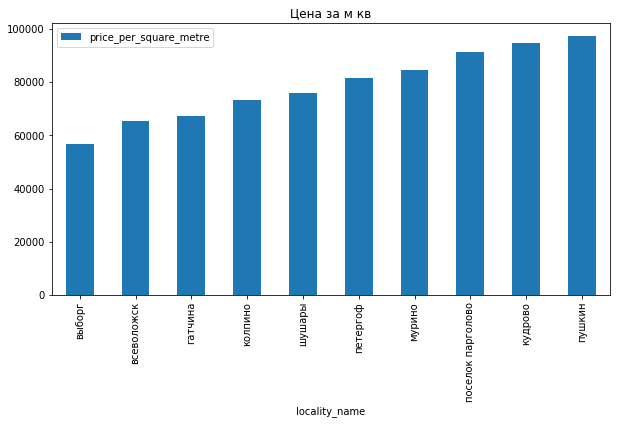

In [131]:
(top_10.sort_values(by='price_per_square_metre')
 .plot(kind='bar', y='price_per_square_metre', figsize=(10,5), title='Цена за м кв'))

Вывод:
Самое дорогое жилье в Пушкино и Кудрово. Самое дешевое жилье из 10ки крупнейших населенных пунктов в ЛО во Всеволжске и Выборге.

In [132]:
data_by_loc = (data
                     .pivot_table(index='locality_name',
                                  values='price_per_square_metre',
                                  aggfunc=['count','median']))

In [133]:
data_by_loc.columns = ['count','price_per_square_metre_median']

Найду самое дешевое и самое дорогое жилье из всех, представленных в таблицах:

In [134]:
data_by_loc.sort_values(by='price_per_square_metre_median', ascending=False)

,count,price_per_square_metre_median
locality_name,,
поселок лисий нос,2,113728.0
санкт-петербург,11801,101580.0
зеленогорск,19,100000.0
сестрорецк,145,98341.0
пушкин,270,97426.5
...,...,...
поселок совхозный,2,12628.5
деревня выскатка,2,12335.0
деревня вахнова кара,1,11688.0


Удивительно но Питер не на первом месте! Самая дорога недвижимость находится в Поселке Лисий нос - это поселок с элитной недвижимостью. СПБ на втором месте, далее идут Зеленогорск - курортный город ЛО и Сестрорецк - поселок рядом с Лисьим носом и, соответственно, элитной недвижимостью.
Самое дешевое жилье в Деревне Старополье.

VI. Выделю квартиры в центре СПБ и изучу их.

Создам колонку со значением cityCenters_nearest в км:

In [135]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

Переведу значения в целочисленные:

In [136]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

Нарисую график по сводной таблицы для СПБ по индексу=близость к центру, значению - цена за квадратный метр.

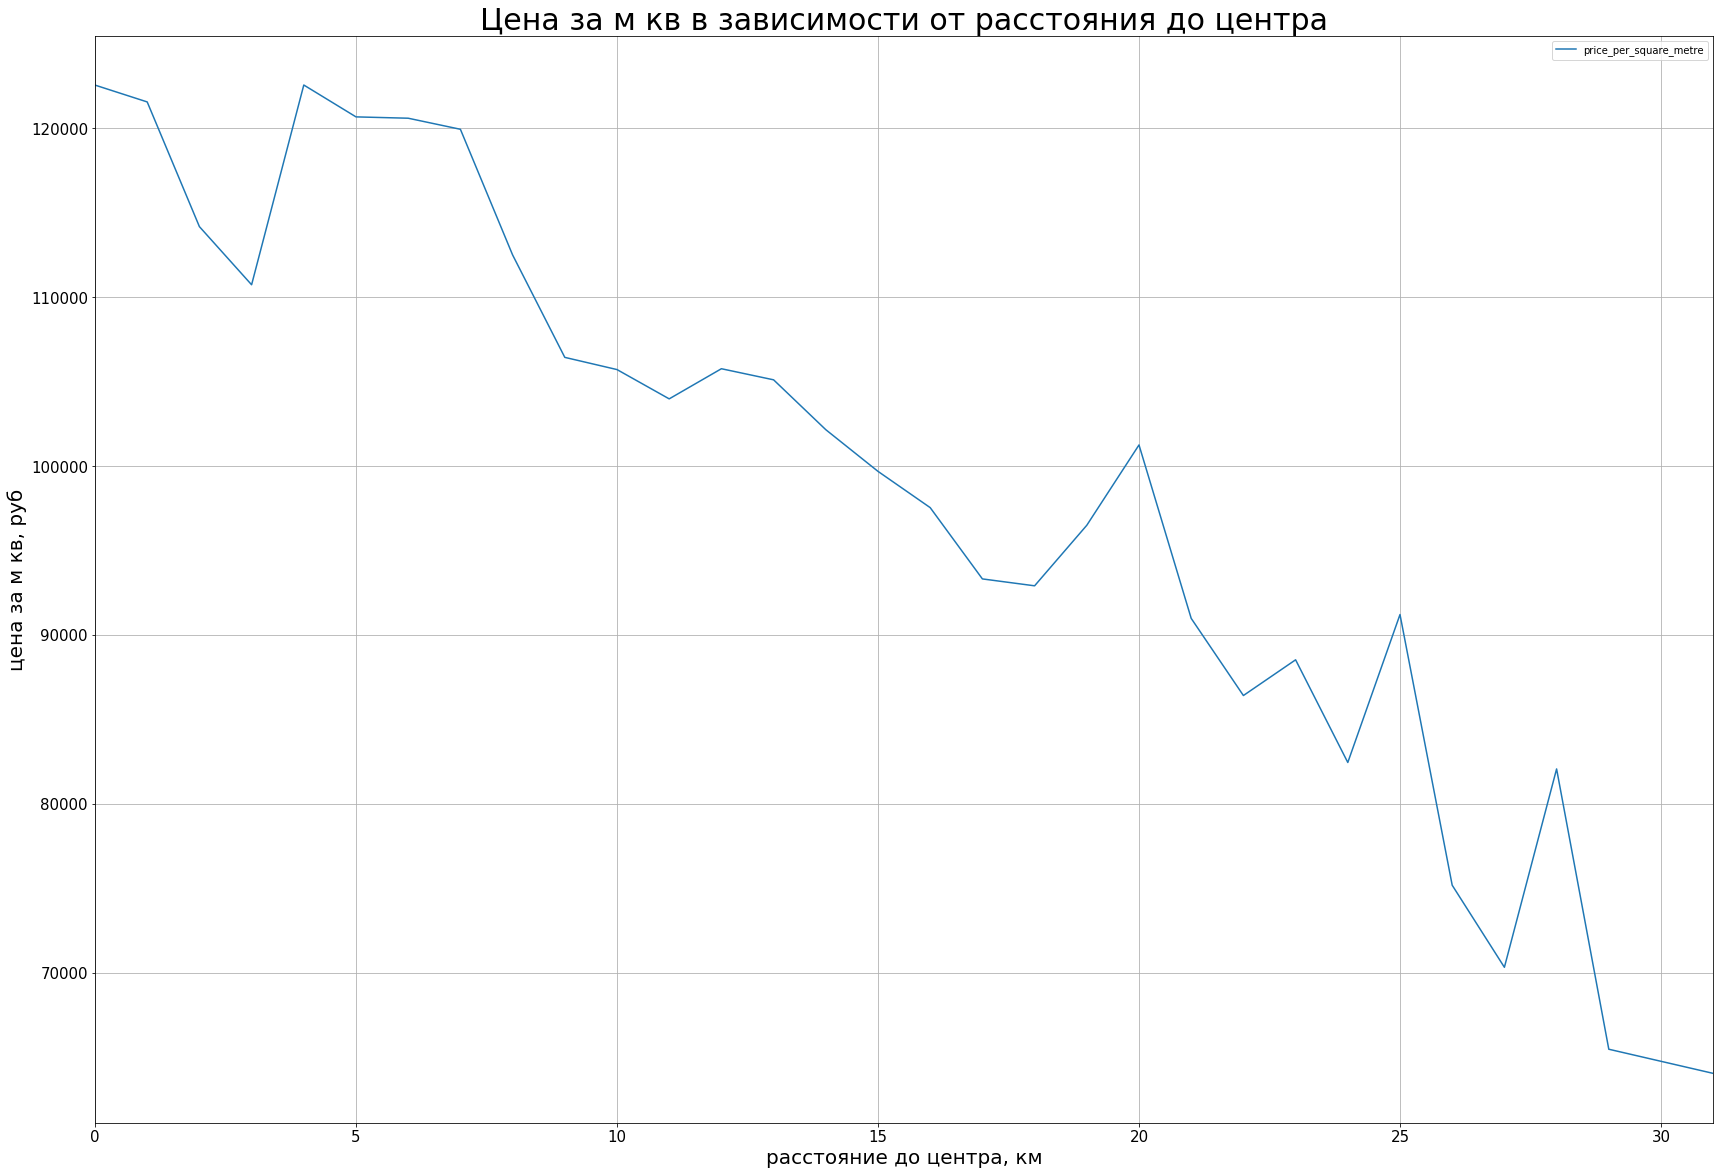

In [137]:
ax = (data
     .query('locality_name == "санкт-петербург"')
     .pivot_table(index='cityCenters_nearest_km', values='price_per_square_metre')
     .plot(grid=True, figsize=(29, 20), fontsize = 15)
)
ax.set_xlabel('расстояние до центра, км', fontsize = 20);
ax.set_ylabel('цена за м кв, руб', fontsize = 20);
ax.set_title('Цена за м кв в зависимости от расстояния до центра', fontsize = 30);

Исходя из графика, буду считать, что квартиры в центре - это квартиры на расстоянии до 7 км от центра - в этой точке график резко уходит вниз. Есть еще спад в промежутке  от 0 до 5 км, но, я предположу, что этот спад из-за Василеостровского и Петроградского районов - они находятся близко к центру, но отделены от основной части города мостами, которые разводят ночью. Поэтому цена квартир в этих районах может быть ниже цены других квартир в центре.
Рассмотрю отдельно квартиры в центре и вне центра.

VII. Рассмотрю отличия квартир в центре и вне центра.

1. Создам 2 среза данных: квартиры в центре и квартиры вне центра. Далее попарно пострю гистограммы для каждого среза по списку параметров (задала его в предыдущей части).

In [138]:
spb_centre_data = data.query('locality_name == "санкт-петербург" and cityCenters_nearest_km <= 7')

In [139]:
spb_out_of_centre_data = data.query('locality_name == "санкт-петербург" and cityCenters_nearest_km > 7')

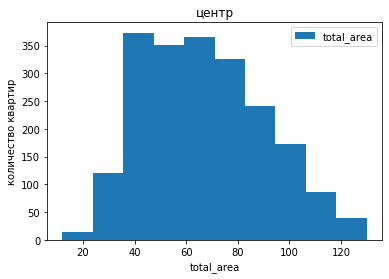

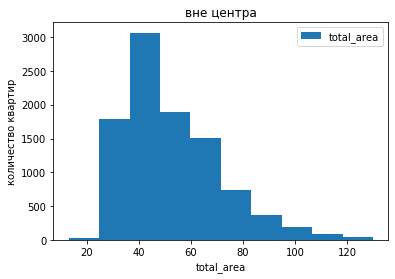

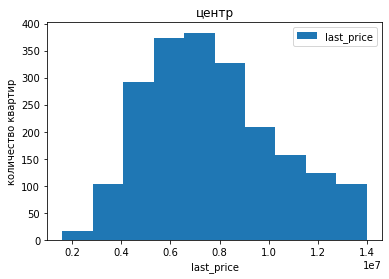

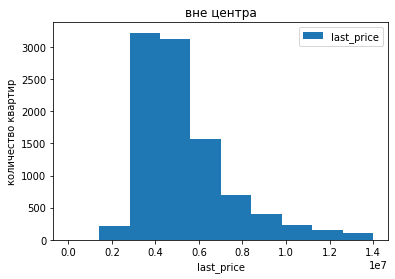

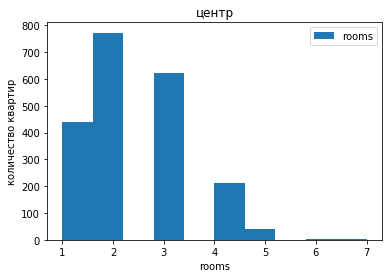

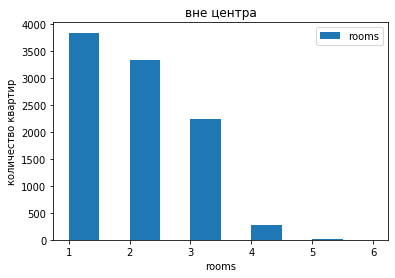

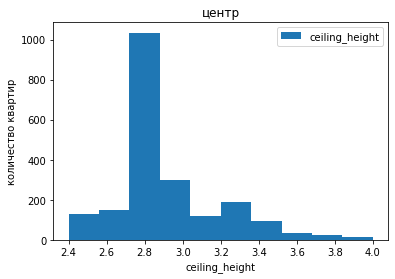

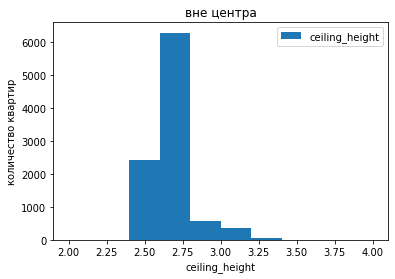

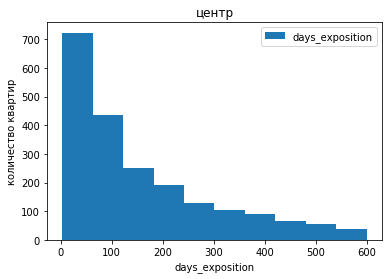

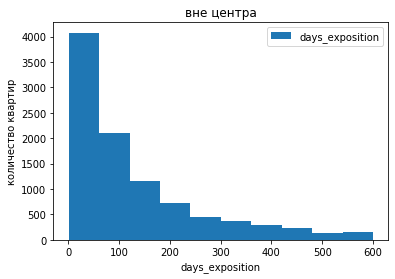

In [140]:
for item in list:
    ax = spb_centre_data.plot(kind = 'hist', 
             y = item, title = 'центр');
    bx = spb_out_of_centre_data.plot(kind = 'hist',
             y = item, title = 'вне центра');
    ax.set_xlabel(item);
    ax.set_ylabel('количество квартир');
    bx.set_xlabel(item);
    bx.set_ylabel('количество квартир');

Вывод: 
1. В центре средняя площадь квартир больше, чем вне центра. Вне центра очень мало квартир более 80 м кв, в то время как в центре такие квартиры встречаются часто.
2. В центре квартиры дороже, чем вне центра. Основная масса квартир вне центра стоит до 7 млн рублей, в центре - больше 7ми.
3. В центре преобладают 2-комнатные квартиры, вне центра - 1-комнатные. 
4. Средняя высота потолков и в центре и вне его примерно равна, однако в центре намного чаще встречаются квартиры с потолками выше среднего, вне центра - наоборот, чаще можно купить квартиру с потолками ниже среднего.
5. Колчество дней продажи квартиры и в центре и вне центра распределено примерно одинаково. На каждую квартиру найдется свой покупатель.

2. Рассмотрю корреляцию цены и и основных факторов из списка (создала на предыдущем этапе).

In [141]:
for parameter in parameters:
    print('Для квартир в центре СПБ корреляция цены за м кв с', 
          parameter, 
          'равна {:.1f}'
          .format(spb_centre_data['price_per_square_metre'].corr(spb_centre_data[parameter])))

Для квартир в центре СПБ корреляция цены за м кв с rooms равна -0.5
Для квартир в центре СПБ корреляция цены за м кв с floor_category_int равна 0.2
Для квартир в центре СПБ корреляция цены за м кв с cityCenters_nearest равна 0.0
Для квартир в центре СПБ корреляция цены за м кв с total_area равна -0.4
Для квартир в центре СПБ корреляция цены за м кв с weekday равна 0.0
Для квартир в центре СПБ корреляция цены за м кв с month равна -0.0
Для квартир в центре СПБ корреляция цены за м кв с year равна 0.1
Для квартир в центре СПБ корреляция цены за м кв с ceiling_height равна -0.1
Для квартир в центре СПБ корреляция цены за м кв с floors_total равна 0.3
Для квартир в центре СПБ корреляция цены за м кв с balcony равна 0.3


Вывод: 
Цена квартиры в центре больше всего зависит от количества комнат: чем меньше комнат, тем выше цена за квадратный метр. 
Чуть меньше корреляци с общей площадью квартиры. Слабая корреляция цены и количества этажей, балконов, самого этажа. И цена за квадратный метр не зависит от близости к центру (ведь все квартиры в центре близки к центру), высоты потолков, и даты размещения объявления.

In [142]:
for parameter in parameters:
    print('Для квартир вне центра СПБ корреляция цены за м кв с', 
          parameter, 
          'равна {:.1f}'
          .format(spb_out_of_centre_data['price_per_square_metre'].corr(spb_out_of_centre_data[parameter])))                 

Для квартир вне центра СПБ корреляция цены за м кв с rooms равна -0.3
Для квартир вне центра СПБ корреляция цены за м кв с floor_category_int равна 0.2
Для квартир вне центра СПБ корреляция цены за м кв с cityCenters_nearest равна -0.2
Для квартир вне центра СПБ корреляция цены за м кв с total_area равна -0.1
Для квартир вне центра СПБ корреляция цены за м кв с weekday равна 0.0
Для квартир вне центра СПБ корреляция цены за м кв с month равна -0.0
Для квартир вне центра СПБ корреляция цены за м кв с year равна 0.2
Для квартир вне центра СПБ корреляция цены за м кв с ceiling_height равна 0.2
Для квартир вне центра СПБ корреляция цены за м кв с floors_total равна 0.3
Для квартир вне центра СПБ корреляция цены за м кв с balcony равна 0.2


Вывод:
Цена квартиры вне центра слабо зависит от количества комнат (чем их больше, тем цена дешевле), количества этажей (чем их больше - тем квартира дороже), очень слабо - от этажа, близости к центру, года размещения обявления, высоты потолков. И цена за квадратный метр не зависит от общей площади квартиры, количества балконов, дня и месяца размещения объявления.

Общий вывод: В целом, я не увидела существенных различий в корреляции цены за кв м и основных факторов в центре и вне центра. Разве что в центре более выржена корреляция цены и количества комнат. 

VII. Подберу наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Узнаю, влияют ли они на цену. Сравню со схожими параметрами квартир типовой планировки.

In [143]:
data_apartment = data.query('is_apartment == True')

In [144]:
data_studio = data.query('studio == True')

In [145]:
data_open_plan = data.query('open_plan == True')

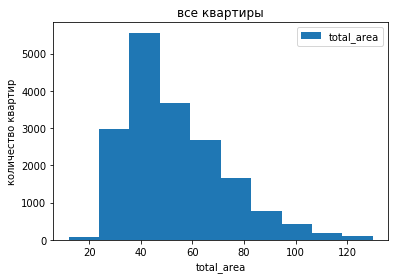

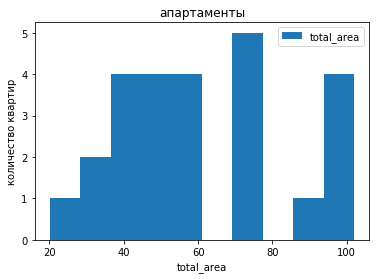

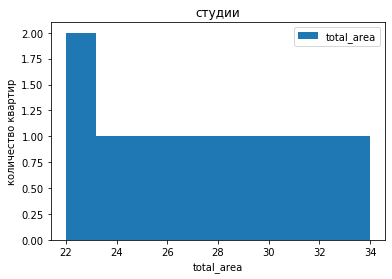

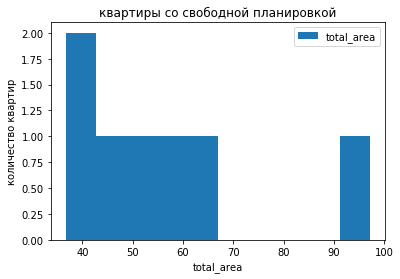

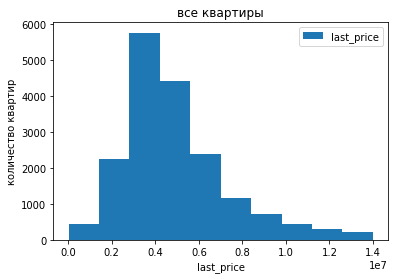

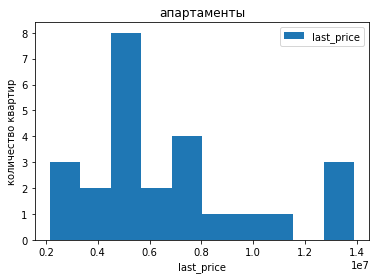

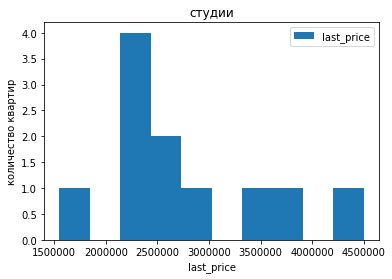

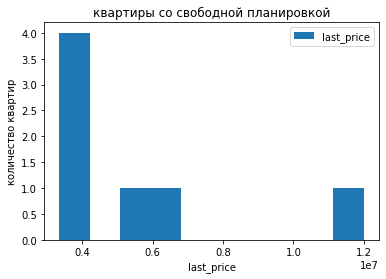

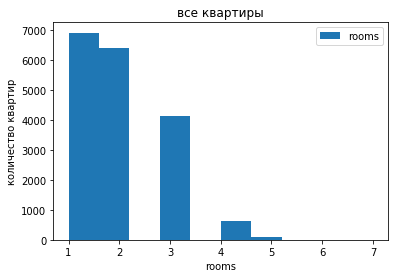

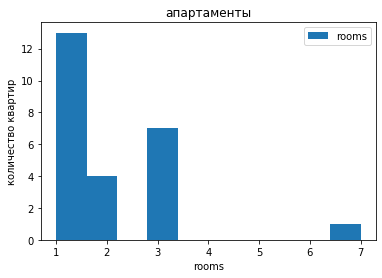

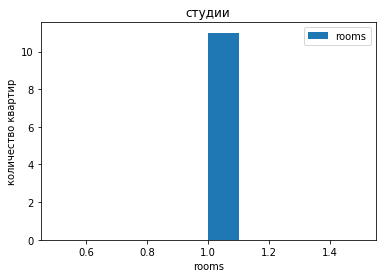

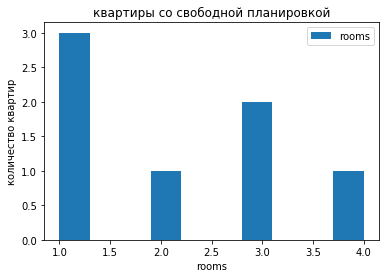

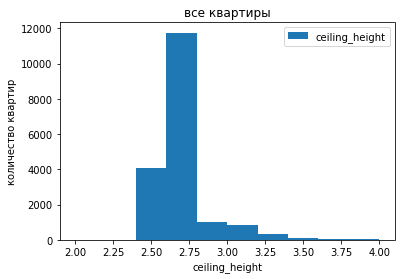

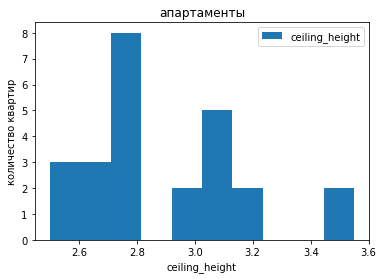

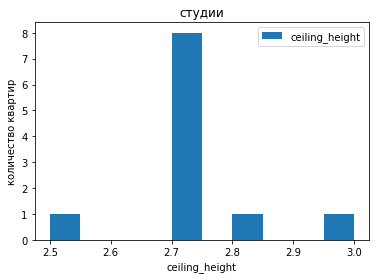

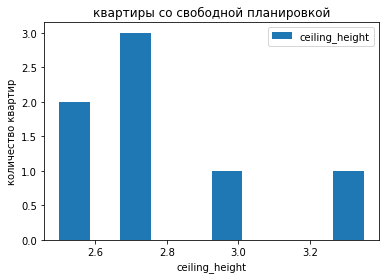

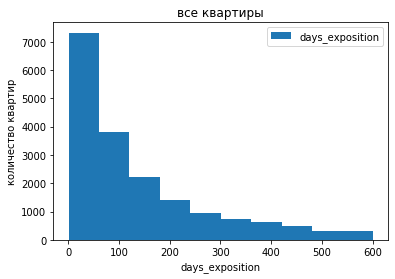

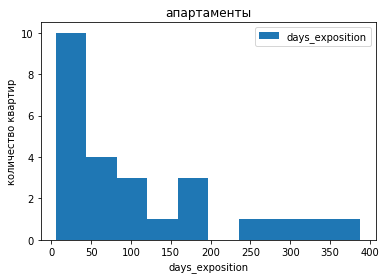

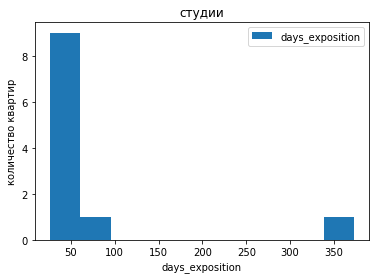

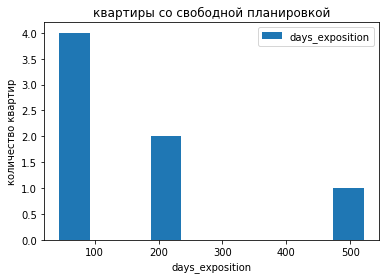

In [146]:
for item in list:
    ax = data.plot(kind = 'hist', y = item, title = 'все квартиры');
    bx = data_apartment.plot(kind = 'hist',y = item, title = 'апартаменты');
    cx = data_studio.plot(kind = 'hist',y = item, title = 'студии');
    dx = data_open_plan.plot(kind = 'hist',y = item, title = 'квартиры со свободной планировкой');
    ax.set_xlabel(item);
    ax.set_ylabel('количество квартир');
    bx.set_xlabel(item);
    bx.set_ylabel('количество квартир');
    cx.set_xlabel(item);
    cx.set_ylabel('количество квартир');
    dx.set_xlabel(item);
    dx.set_ylabel('количество квартир');

Вывод:
1. Площадь студий и квартир со свободной планировкой в среднем меньше, чем остальных квартир. 
2. Цена студий и квартир свободной планировки в среднем ниже, чем цена остальных квартир.
3. В студиях и квартирах со свободной планировкой в основном 0 комнат, что меньше, чем во всех остальных квартирах.
4. Высота потолков в среднем везде одинаковая.
5. Студии и квартиры со свободной планировкой в среднем продаются быстрее, чем все остальные.

Общий вывод:

Данных о апартаментах, студиях, квартирах со свободной планировкой очень мало6 поэтому я не могу в полной мере оценить эти типы квартир.
Также мне показались очень странными основные парметры апартаментов - очень разбросаны значения. Я связываю это с тем, что люди, которые заполнили эту графу как "да", неправильно понимают суть квартир-апартаментов. Поэтому данную категорию я не оценивала.

In [147]:
for parameter in parameters:
    print('Для апартаментов корреляция цены за м кв с', 
          parameter, 
          'равна {:.1f}'
          .format(data_apartment['price_per_square_metre'].corr(data_apartment[parameter])))

Для апартаментов корреляция цены за м кв с rooms равна 0.0
Для апартаментов корреляция цены за м кв с floor_category_int равна 0.0
Для апартаментов корреляция цены за м кв с cityCenters_nearest равна -0.2
Для апартаментов корреляция цены за м кв с total_area равна 0.0
Для апартаментов корреляция цены за м кв с weekday равна 0.0
Для апартаментов корреляция цены за м кв с month равна -0.2
Для апартаментов корреляция цены за м кв с year равна 0.2
Для апартаментов корреляция цены за м кв с ceiling_height равна 0.1
Для апартаментов корреляция цены за м кв с floors_total равна 0.2
Для апартаментов корреляция цены за м кв с balcony равна 0.1


вывод: Цена апартаментов очень слабо зависит от близости к центру, месяца и года размещения объявления, количества этажей и совсем не зависит от остальных параметров.

In [148]:
for parameter in parameters:
    print('Для студий корреляция цены за м кв с', 
          parameter, 
          'равна {:.1f}'
          .format(data_studio['price_per_square_metre'].corr(data_studio[parameter])))

Для студий корреляция цены за м кв с rooms равна nan
Для студий корреляция цены за м кв с floor_category_int равна -0.5
Для студий корреляция цены за м кв с cityCenters_nearest равна -0.6
Для студий корреляция цены за м кв с total_area равна 0.3
Для студий корреляция цены за м кв с weekday равна -0.5
Для студий корреляция цены за м кв с month равна -0.4
Для студий корреляция цены за м кв с year равна -0.0
Для студий корреляция цены за м кв с ceiling_height равна 0.5
Для студий корреляция цены за м кв с floors_total равна -0.0
Для студий корреляция цены за м кв с balcony равна 0.2


Вывод: Цена студий больше всегт зависит от близости к центру, очень слабо зависит от этажа, высоты потолков и количества балконов и совсем не зависит от остальных параметров.

In [149]:
for parameter in parameters:
    print('Для квартир со свободной планировкой корреляция цены за м кв с', 
          parameter, 
          'равна {:.1f}'
          .format(data_open_plan['price_per_square_metre'].corr(data_open_plan[parameter])))

Для квартир со свободной планировкой корреляция цены за м кв с rooms равна -0.1
Для квартир со свободной планировкой корреляция цены за м кв с floor_category_int равна -0.0
Для квартир со свободной планировкой корреляция цены за м кв с cityCenters_nearest равна -0.6
Для квартир со свободной планировкой корреляция цены за м кв с total_area равна 0.2
Для квартир со свободной планировкой корреляция цены за м кв с weekday равна -0.4
Для квартир со свободной планировкой корреляция цены за м кв с month равна 0.5
Для квартир со свободной планировкой корреляция цены за м кв с year равна 0.0
Для квартир со свободной планировкой корреляция цены за м кв с ceiling_height равна 0.6
Для квартир со свободной планировкой корреляция цены за м кв с floors_total равна 0.4
Для квартир со свободной планировкой корреляция цены за м кв с balcony равна -0.3


Цена квартир со свободной планировкой больше всего зависит от близости к центру, очень слабо зависит от высоты потолков и количества этажей и совсем не зависит от остальных параметров.

Общий вывод: 
I.
1. Большая часть квартир стоит до 14 млн, в среднем, квартира стоит 4.65 млн
2. Большая часть квартир имеет площадь до 130 м кв, средняя площадь квартиры - 52 км м
3. В большей части квартир до 7 комнат, в среднем - 2 комнаты.
4. В большей части квартир потолки до 3 м, в среднем - 2.7 м
5. Большая часть квартир продается за период до 600 дней. В среднем, квартира продается за 95 дней. Если квартира продается быстрее, чем за 45 дней, значит, она продалась быстро, если дольше, чем за 232 дня - квартира проедается долго.

II.

Больше всего цена квартиры зависит от близости к центру, меньше всего - от даты размещения объявления. Для квартир в центре СПБ близость к центру не так важна (они все близко), для них цена квадратного метра становится тем дешевле, чем больше комнат и площадь.

III.

Самая дорога недвижимость находится в Поселке Лисий нос - это поселок с элитной недвижимостью. СПБ на втором месте, далее идут Зеленогорск - курортный город ЛО и Сестрорецк - поселок рядом с Лисьим носом и, соответственно, элитной недвижимостью.
Самое дешевое жилье в Деревне Старополье.
Если рассматривать выборку объявлений из ЛО, то населеные пункты с самым большим количеством объявлений - это Кудрово и Пушкин.

IV. Студии и квартиры со свободной планировкой в среднем дешевле и меньше всех остальных квартир и продаются они немного быстрее.


### Шаг 5. Общий вывод

I. Чистота данных.

Пропусков в изначальном датафрейме было очень много - в 14 столбцах из 31. Это логично - большую часть параметров заполняли люди, а они не любят заполнять абсолютно все ячейки в форме, или даже просто не знают некоторых данных о своей квартире. Также много пропусков было в картографических данных, рассчитываемых автоматически, и некоторые данные противоречили друг другу.И если на пропуски в данных, которые заполняют люди, мы не можем повлиять, то пропуски в картографических данных вполне возможно исключить в будущем. Возможно, какая-то настройка работает неправильно, об этом я бы сообщила коллегам, занимающимся сбором данных и попросила поправить. 
В картографических данных было слишком много пропусков, а также противоречий, поэтому я не использовала их при анализе.

II. Основные параметры квартир.

1. Большая часть квартир стоит до 14 млн, в среднем, квартира стоит 4.65 млн
2. Большая часть квартир имеет площадь до 130 м кв, средняя площадь квартиры - 52 км м
3. В большей части квартир до 7 комнат, в среднем - 2 комнаты.
4. В большей части квартир потолки до 3 м, в среднем - 2.7 м
5. Большая часть квартир продается за период до 600 дней. В среднем, квартира продается за 95 дней. Если квартира продается быстрее, чем за 45 дней, значит, она продалась быстро, если дольше, чем за 232 дня - квартира продается долго.

III. Цена квартир.

Самая дорога недвижимость находится в Поселке Лисий нос - это поселок с элитной недвижимостью. СПБ на втором месте, далее идут Зеленогорск - курортный город ЛО и Сестрорецк - поселок рядом с Лисьим носом и, соответственно, элитной недвижимостью.
Самое дешевое жилье в Деревне Старополье.

IV. Сравнительный анализ квартир в центре и вне центра СПБ:

1. В центре средняя площадь квартир больше, чем вне центра. Вне центра очень мало квартир более 80 м кв, в то время как в центре такие квартиры встречаются часто.
2. В центре квартиры дороже, чем вне центра. Основная масса квартир вне центра стоит до 7 млн рублей, в центре - больше 7ми.
3. В центре преобладают 2-комнатные квартиры, вне центра - 1-комнатные. 
4. Средняя высота потолков и в центре и вне его примерно равна, однако в центре намного чаще встречаются квартиры с потолками выше среднего, вне центра - наоборот, чаще можно купить квартиру с потолками ниже среднего.
5. Колчество дней продажи квартиры и в центре и вне центра распределено примерно одинаково. На каждую квартиру найдется свой покупатель.

V. Факторы, влияющие на цену квартиры.

Больше всего цена квартиры зависит от близости к центру, меньше всего - от даты размещения объявления, но и остальные параметры малозначительны. Для квартир в центре СПБ близость к центру не так важна (они все близко), для них более всего влияет на цену количество комнат и площадь квартиры: цена квадратного метра становится тем дешевле, чем больше комнат и площадь.

VI. Студии и квартиры со свободной планировкой в среднем дешевле и меньше всех остальных квартир и продаются они немного быстрее. 